# Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/projectdata/climate_change_dataset.csv')
df.head()

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


In [3]:
df.describe()

,Year,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,2011.432000,19.883100,10.425800,3.009600,1738.761000,7.053830e+08,27.300500,7.291000,40.572000
std,7.147199,8.542897,5.614665,1.146081,708.976616,4.093910e+08,12.970808,4.422655,17.398998
min,2000.000000,5.000000,0.500000,1.000000,501.000000,3.660891e+06,5.100000,0.000000,10.100000
25%,2005.000000,12.175000,5.575000,2.000000,1098.750000,3.436242e+08,16.100000,3.000000,25.600000
50%,2012.000000,20.100000,10.700000,3.000000,1726.000000,7.131166e+08,27.150000,8.000000,41.150000
75%,2018.000000,27.225000,15.400000,4.000000,2362.500000,1.073868e+09,38.925000,11.000000,55.800000
max,2023.000000,34.900000,20.000000,5.000000,2999.000000,1.397016e+09,50.000000,14.000000,70.000000


# Graphs

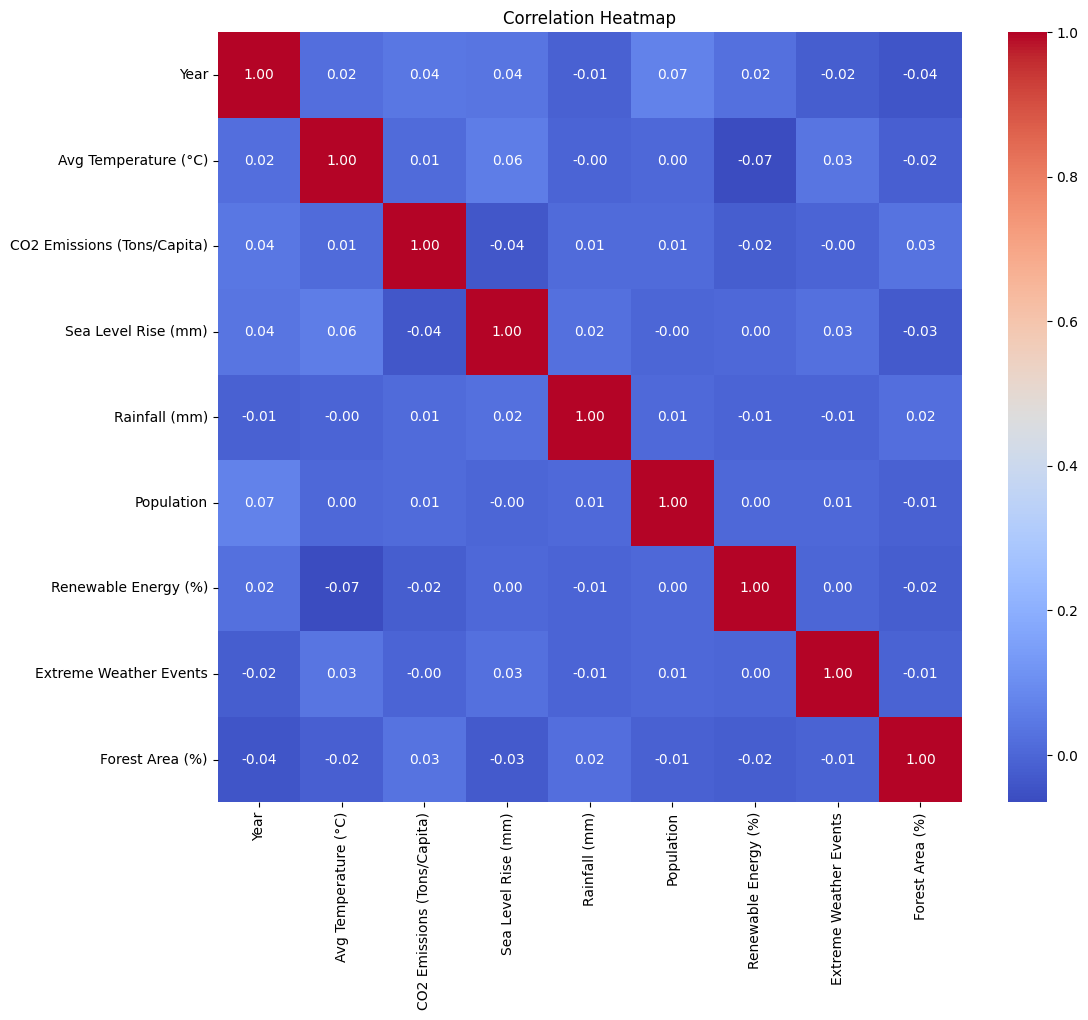

In [4]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

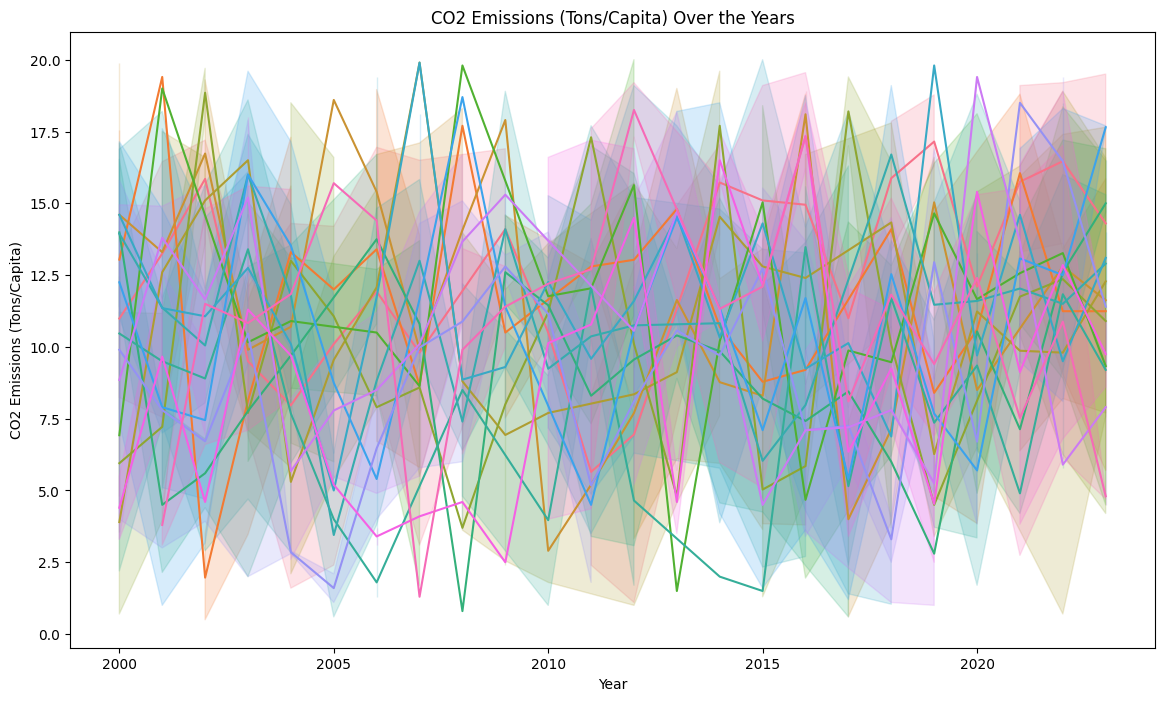

In [5]:
# CO2 Emissions over the Years
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Year', y='CO2 Emissions (Tons/Capita)', hue='Country', legend=None)
plt.title('CO2 Emissions (Tons/Capita) Over the Years')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Tons/Capita)')
plt.show()

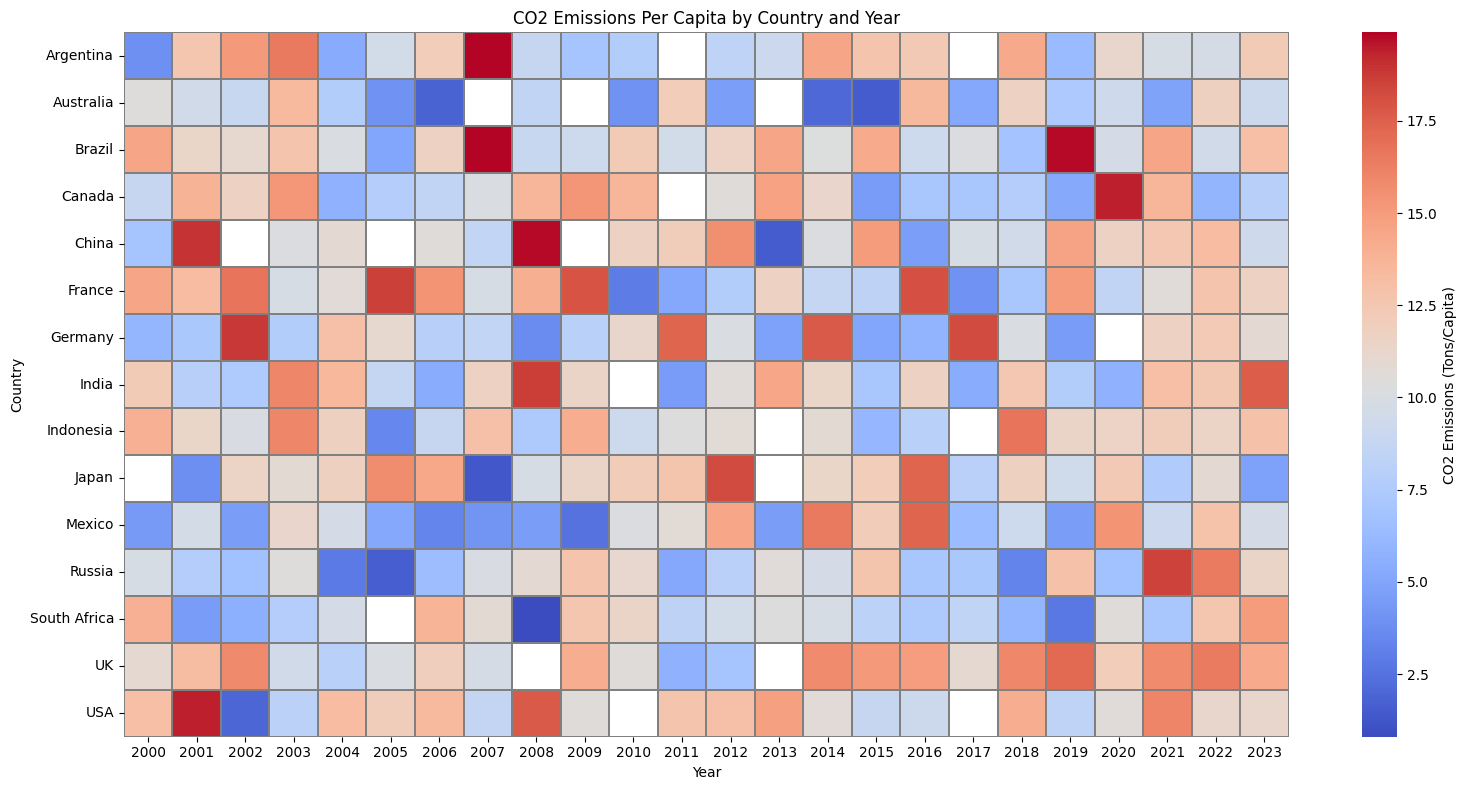

In [6]:
import matplotlib.patches as mpatches

avg_emission = df.groupby(["Country", "Year"])["CO2 Emissions (Tons/Capita)"].mean().reset_index()

emission_matrix = avg_emission.pivot(index="Country", columns="Year", values="CO2 Emissions (Tons/Capita)")

mask = emission_matrix.isna()
numeric_matrix = emission_matrix.copy()

plt.figure(figsize=(16, 8))
ax = sns.heatmap(
    numeric_matrix,
    cmap="coolwarm",
    linewidths=0.3,
    linecolor='gray',
    annot=False,
    cbar_kws={'label': 'CO2 Emissions (Tons/Capita)'},
    mask=mask
)

plt.title("CO2 Emissions Per Capita by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


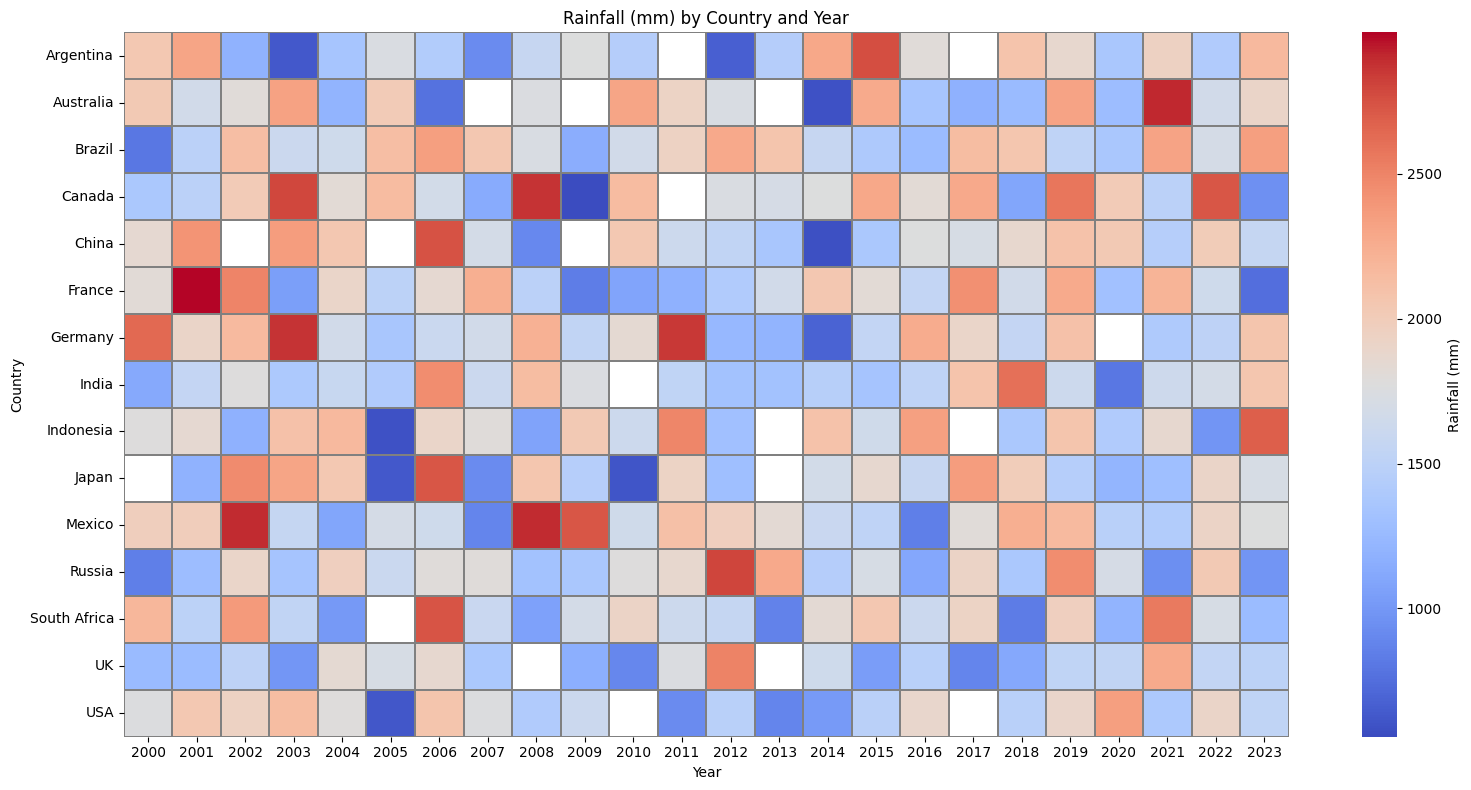

In [7]:
# Replotting rainfall heatmap with a different "No Data" color

# Step 1: Average rainfall per country per year
avg_rainfall = df.groupby(["Country", "Year"])["Rainfall (mm)"].mean().reset_index()

# Step 2: Pivot for heatmap
rainfall_matrix = avg_rainfall.pivot(index="Country", columns="Year", values="Rainfall (mm)")

# Step 3: Create mask for missing values
rainfall_mask = rainfall_matrix.isna()
rainfall_numeric = rainfall_matrix.copy()

# Step 4: Plot heatmap
plt.figure(figsize=(16, 8))
ax = sns.heatmap(
    rainfall_numeric,
    cmap="coolwarm",
    linewidths=0.3,
    linecolor='gray',
    annot=False,
    cbar_kws={'label': 'Rainfall (mm)'},
    mask=rainfall_mask
)


# Step 7: Labels and layout
plt.title("Rainfall (mm) by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


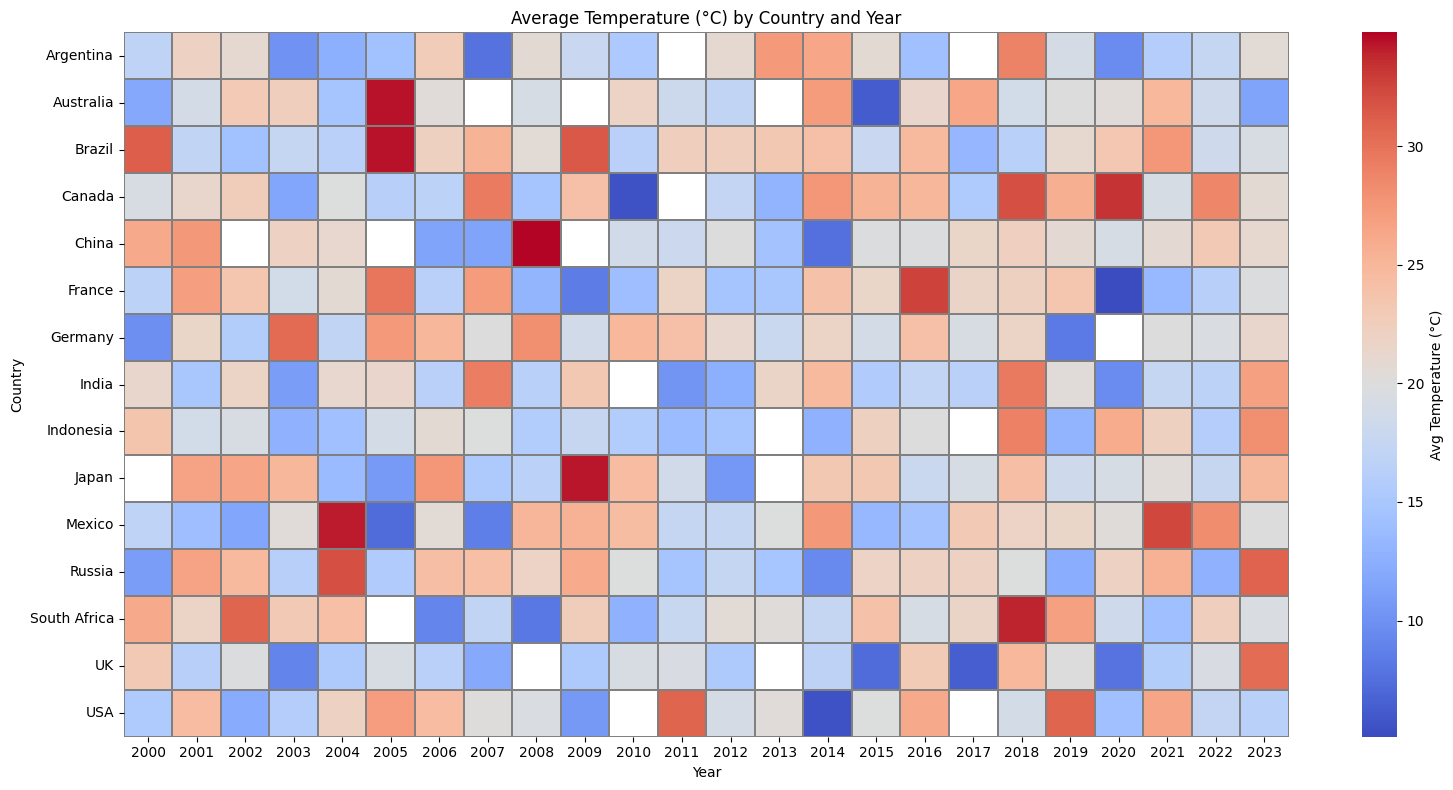

In [8]:
# Use the correct column name: 'Avg Temperature (°C)'

# Step 1: Average temperature per country per year
avg_temp = df.groupby(["Country", "Year"])["Avg Temperature (°C)"].mean().reset_index()

# Step 2: Pivot for heatmap
temp_matrix = avg_temp.pivot(index="Country", columns="Year", values="Avg Temperature (°C)")

# Step 3: Create mask for missing values
temp_mask = temp_matrix.isna()
temp_numeric = temp_matrix.copy()

# Step 4: Plot heatmap
plt.figure(figsize=(16, 8))
ax = sns.heatmap(
    temp_numeric,
    cmap="coolwarm",
    linewidths=0.3,
    linecolor='gray',
    annot=False,
    cbar_kws={'label': 'Avg Temperature (°C)'},
    mask=temp_mask
)

# Step 7: Labels and layout
plt.title("Average Temperature (°C) by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


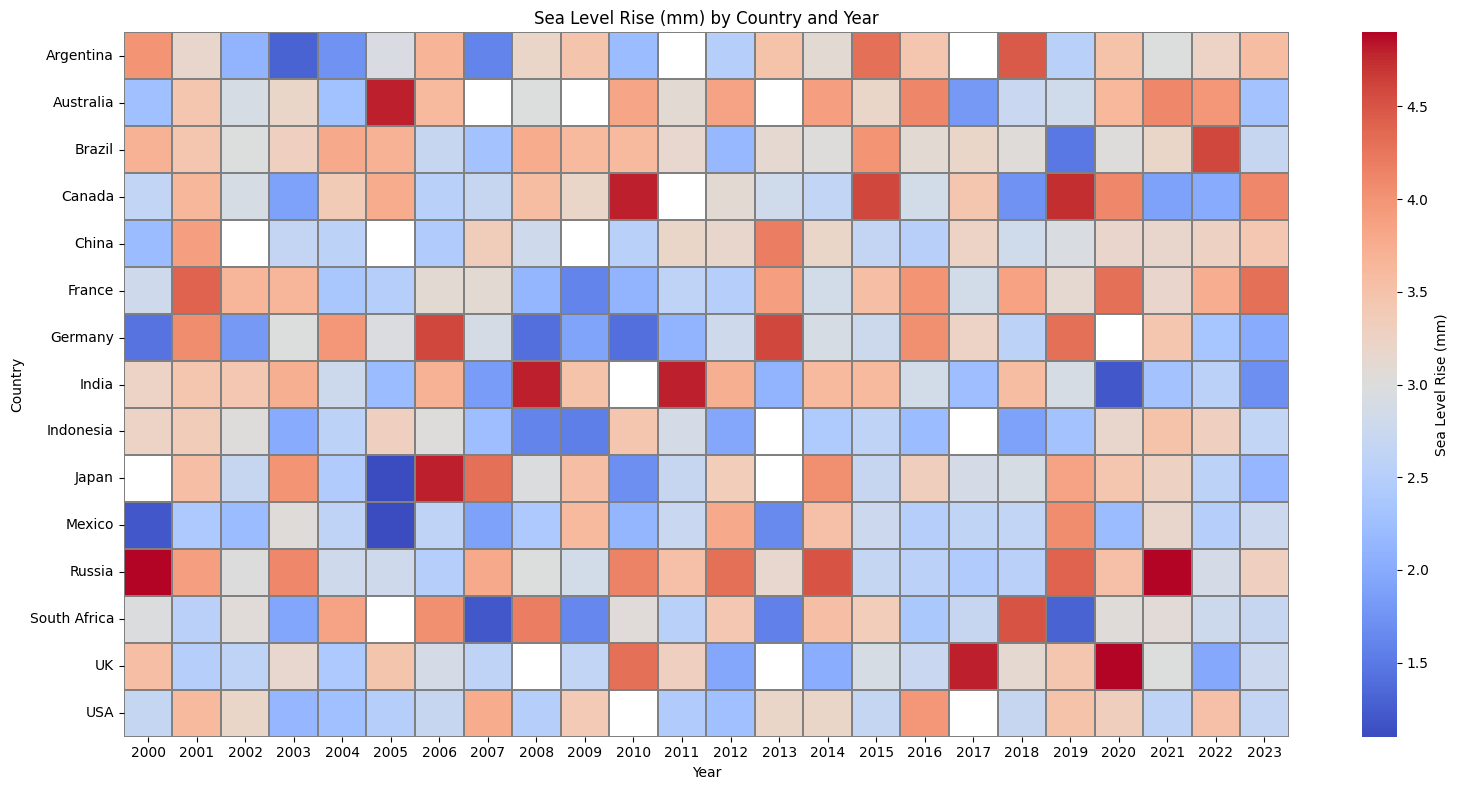

In [9]:
# Generate heatmap for Sea Level Rise (mm) with a unique "No Data" color

# Step 1: Average sea level rise per country per year
avg_sea_level = df.groupby(["Country", "Year"])["Sea Level Rise (mm)"].mean().reset_index()

# Step 2: Pivot for heatmap
sea_level_matrix = avg_sea_level.pivot(index="Country", columns="Year", values="Sea Level Rise (mm)")

# Step 3: Create mask for missing values
sea_level_mask = sea_level_matrix.isna()
sea_level_numeric = sea_level_matrix.copy()

# Step 4: Plot heatmap
plt.figure(figsize=(16, 8))
ax = sns.heatmap(
    sea_level_numeric,
    cmap="coolwarm",
    linewidths=0.3,
    linecolor='gray',
    annot=False,
    cbar_kws={'label': 'Sea Level Rise (mm)'},
    mask=sea_level_mask
)

# Step 7: Labels and layout
plt.title("Sea Level Rise (mm) by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


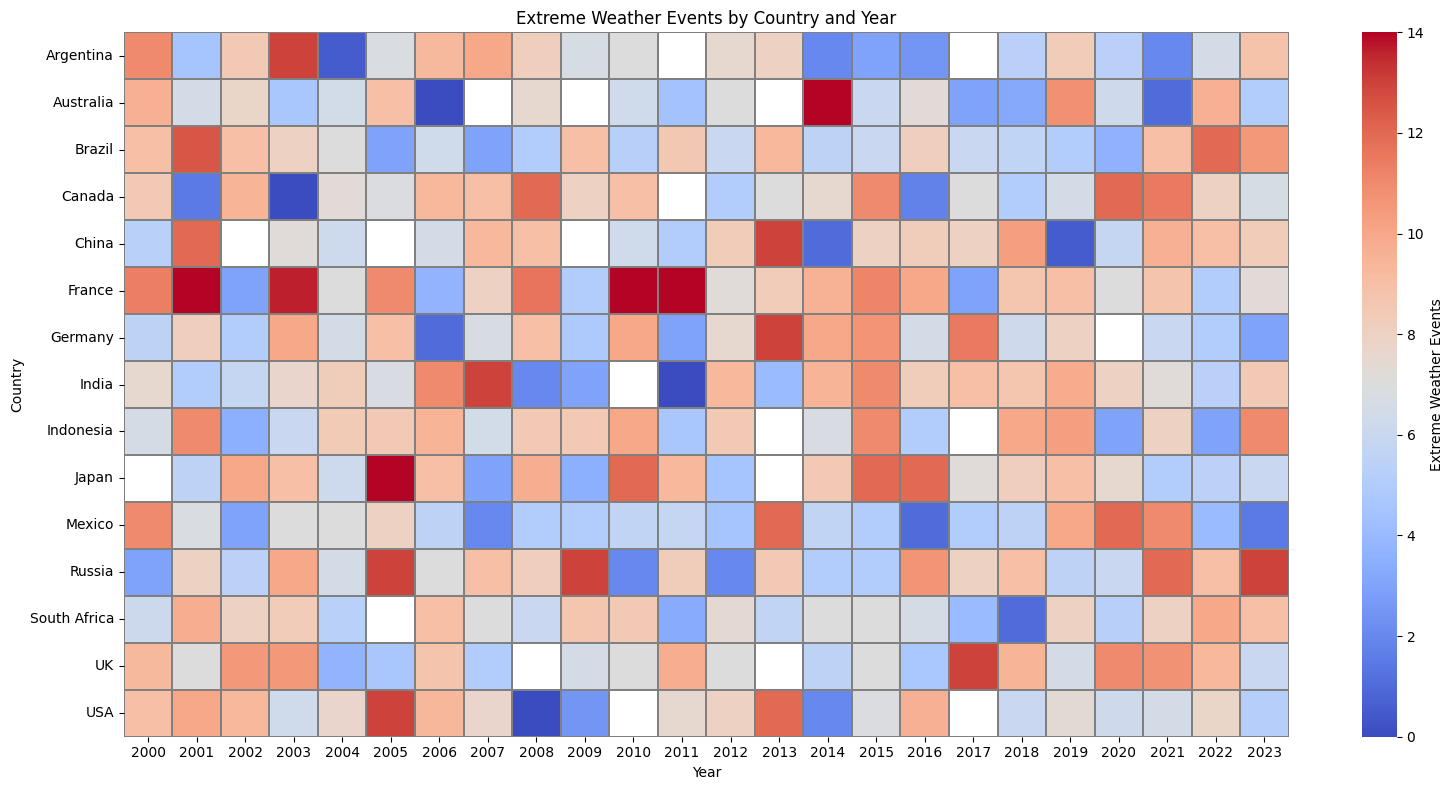

In [10]:
# Replotting with a darker lavender shade for "No Data"

# Step 1: Average number of events per country per year
avg_extreme = df.groupby(["Country", "Year"])["Extreme Weather Events"].mean().reset_index()

# Step 2: Pivot for heatmap
extreme_matrix = avg_extreme.pivot(index="Country", columns="Year", values="Extreme Weather Events")

# Step 3: Create mask for missing values
extreme_mask = extreme_matrix.isna()
extreme_numeric = extreme_matrix.copy()

# Step 4: Plot heatmap
plt.figure(figsize=(16, 8))
ax = sns.heatmap(
    extreme_numeric,
    cmap="coolwarm",
    linewidths=0.3,
    linecolor='gray',
    annot=False,
    cbar_kws={'label': 'Extreme Weather Events'},
    mask=extreme_mask
)

# Step 7: Labels and layout
plt.title("Extreme Weather Events by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


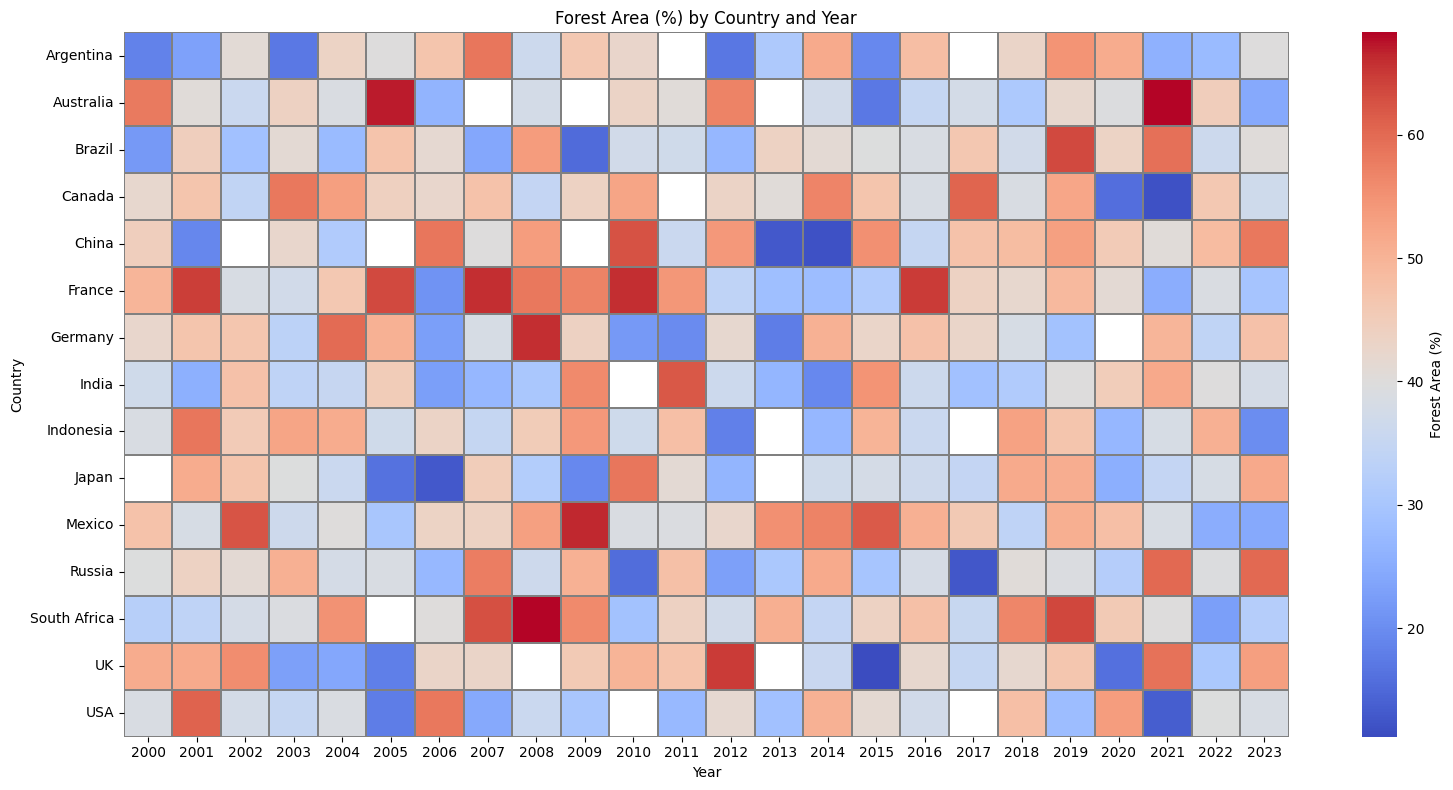

In [11]:
# Replotting Forest Area heatmap with "No Data" color changed to light blue

# Step 1: Average forest area per country per year
avg_forest = df.groupby(["Country", "Year"])["Forest Area (%)"].mean().reset_index()

# Step 2: Pivot for heatmap
forest_matrix = avg_forest.pivot(index="Country", columns="Year", values="Forest Area (%)")

# Step 3: Create mask for missing values
forest_mask = forest_matrix.isna()
forest_numeric = forest_matrix.copy()

# Step 4: Plot heatmap
plt.figure(figsize=(16, 8))
ax = sns.heatmap(
    forest_numeric,
    cmap="coolwarm",
    linewidths=0.3,
    linecolor='gray',
    annot=False,
    cbar_kws={'label': 'Forest Area (%)'},
    mask=forest_mask
)

# Step 7: Labels and layout
plt.title("Forest Area (%) by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


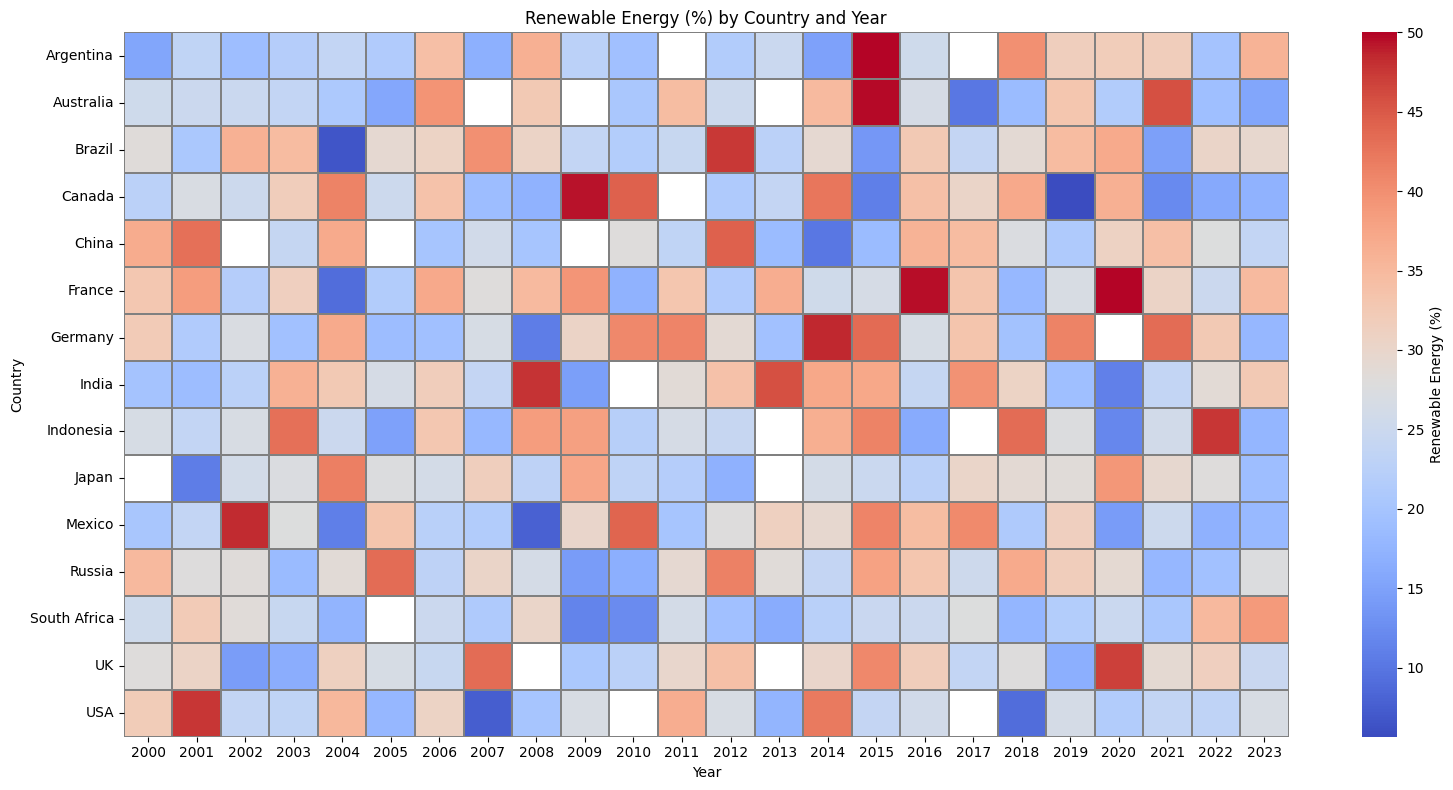

In [12]:
# Generate heatmap for Renewable Energy (%) with a unique "No Data" color

# Step 1: Average renewable energy per country per year
avg_renewable = df.groupby(["Country", "Year"])["Renewable Energy (%)"].mean().reset_index()

# Step 2: Pivot for heatmap
renewable_matrix = avg_renewable.pivot(index="Country", columns="Year", values="Renewable Energy (%)")

# Step 3: Create mask for missing values
renewable_mask = renewable_matrix.isna()
renewable_numeric = renewable_matrix.copy()

# Step 4: Plot heatmap
plt.figure(figsize=(16, 8))
ax = sns.heatmap(
    renewable_numeric,
    cmap="coolwarm",
    linewidths=0.3,
    linecolor='gray',
    annot=False,
    cbar_kws={'label': 'Renewable Energy (%)'},
    mask=renewable_mask
)

# Step 7: Labels and layout
plt.title("Renewable Energy (%) by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


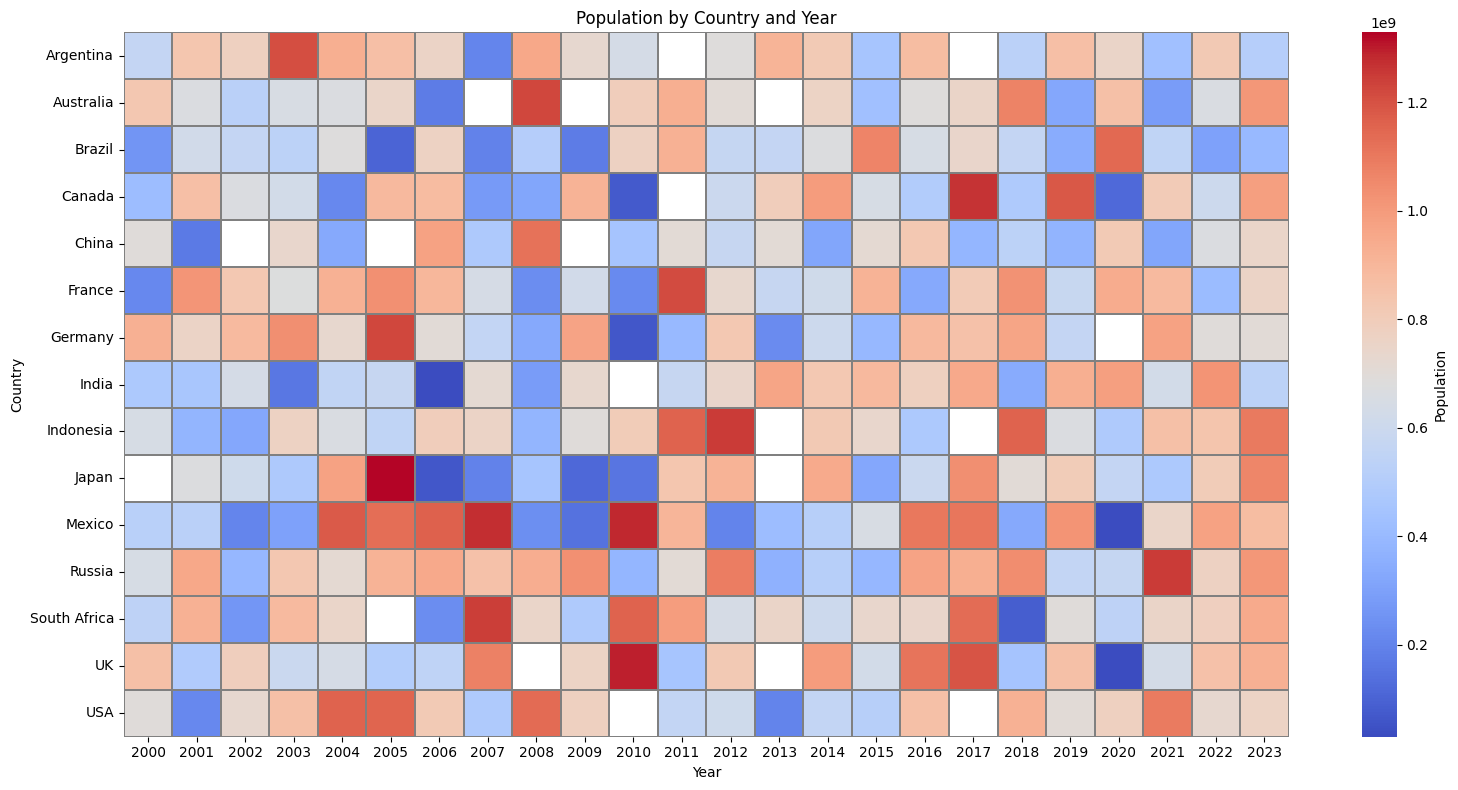

In [13]:
# Replotting Population heatmap with "No Data" color changed to light coral

# Step 1: Average population per country per year
avg_population = df.groupby(["Country", "Year"])["Population"].mean().reset_index()

# Step 2: Pivot for heatmap
population_matrix = avg_population.pivot(index="Country", columns="Year", values="Population")

# Step 3: Create mask for missing values
population_mask = population_matrix.isna()
population_numeric = population_matrix.copy()

# Step 4: Plot heatmap
plt.figure(figsize=(16, 8))
ax = sns.heatmap(
    population_numeric,
    cmap="coolwarm",
    linewidths=0.3,
    linecolor='gray',
    annot=False,
    cbar_kws={'label': 'Population'},
    mask=population_mask
)

# Step 7: Labels and layout
plt.title("Population by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


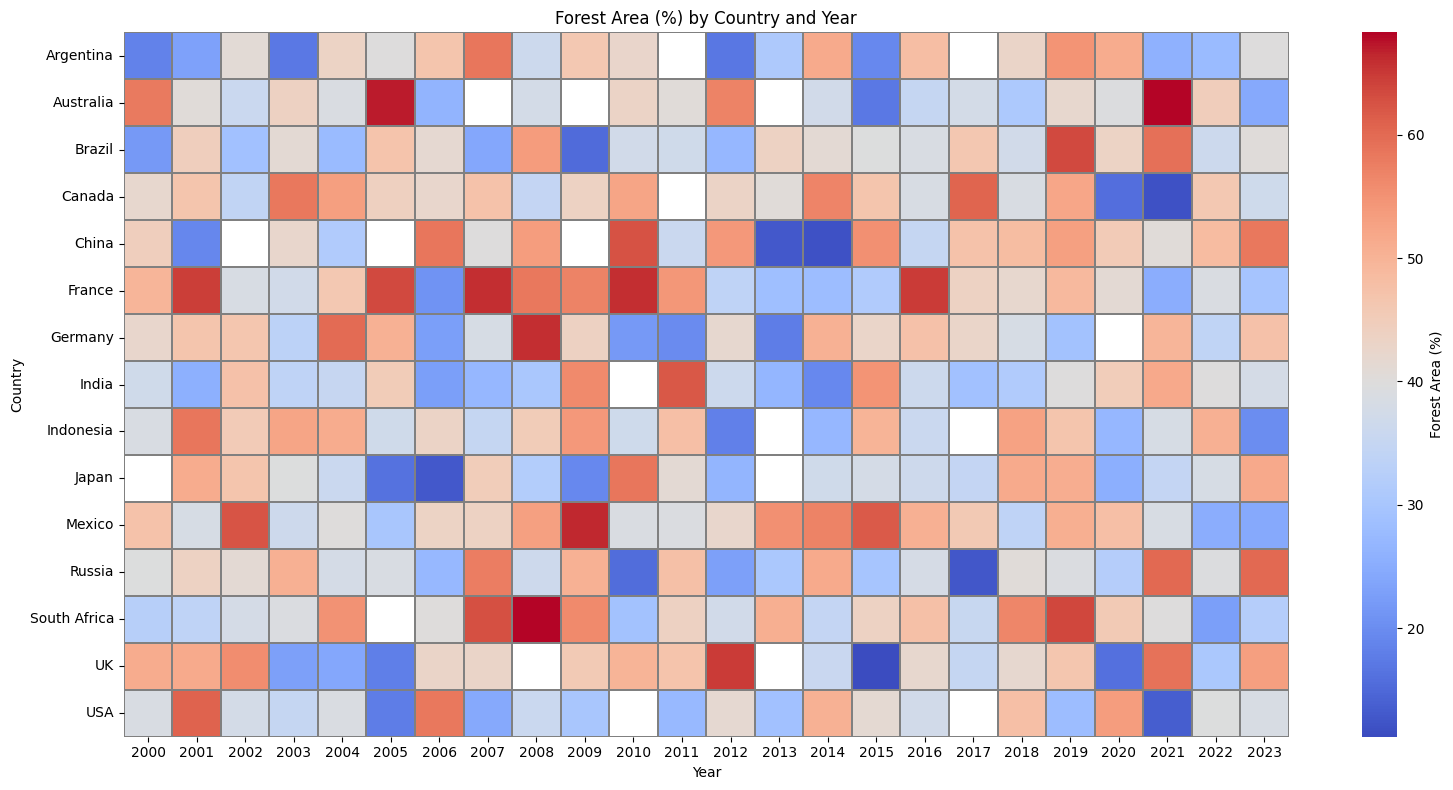

In [14]:
# Replotting Forest Area heatmap with "No Data" color changed to light blue

# Step 1: Average forest area per country per year
avg_forest = df.groupby(["Country", "Year"])["Forest Area (%)"].mean().reset_index()

# Step 2: Pivot for heatmap
forest_matrix = avg_forest.pivot(index="Country", columns="Year", values="Forest Area (%)")

# Step 3: Create mask for missing values
forest_mask = forest_matrix.isna()
forest_numeric = forest_matrix.copy()

# Step 4: Plot heatmap
plt.figure(figsize=(16, 8))
ax = sns.heatmap(
    forest_numeric,
    cmap="coolwarm",
    linewidths=0.3,
    linecolor='gray',
    annot=False,
    cbar_kws={'label': 'Forest Area (%)'},
    mask=forest_mask
)

# Step 7: Labels and layout
plt.title("Forest Area (%) by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


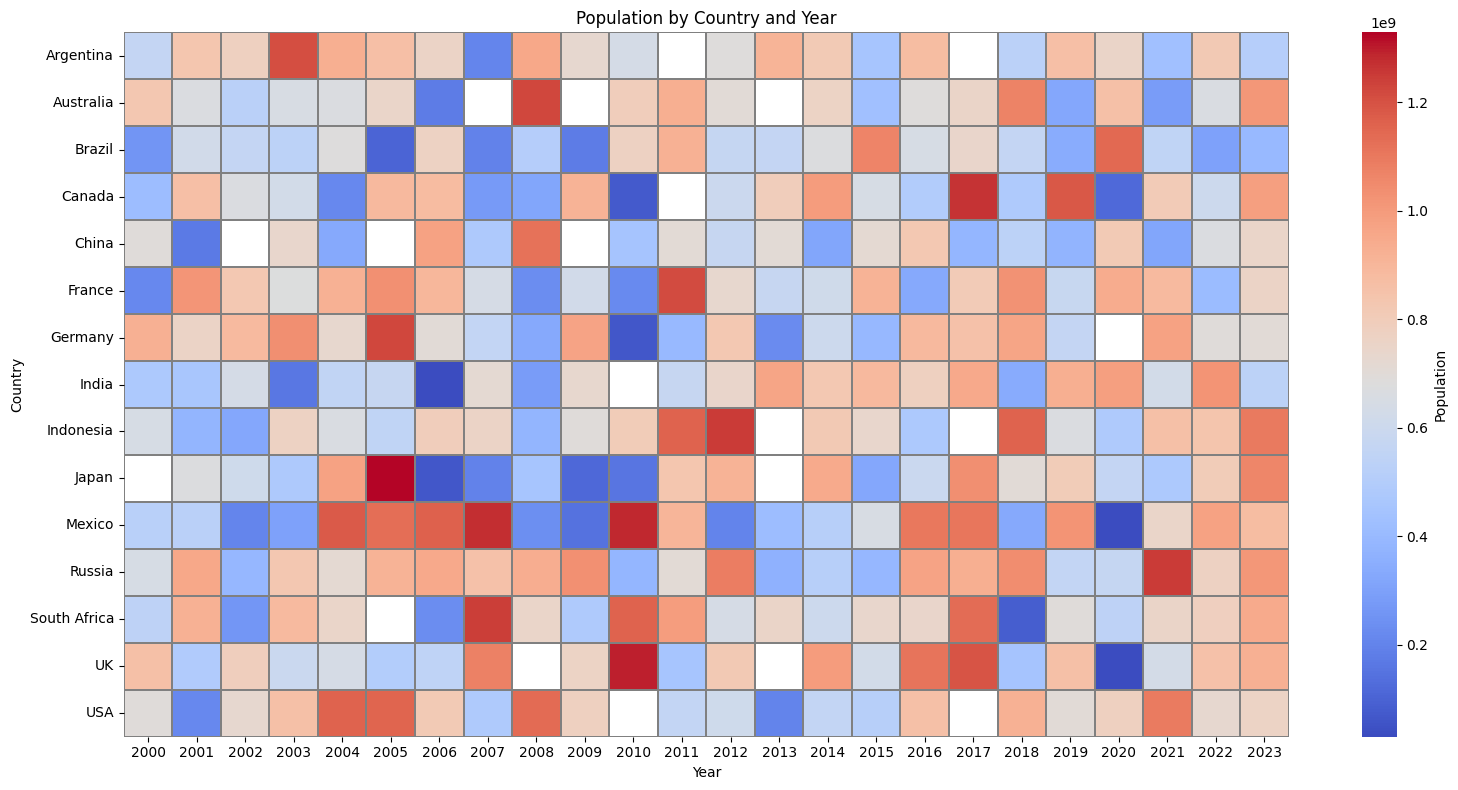

In [15]:
# Replotting Population heatmap with "No Data" color changed to light coral

# Step 1: Average population per country per year
avg_population = df.groupby(["Country", "Year"])["Population"].mean().reset_index()

# Step 2: Pivot for heatmap
population_matrix = avg_population.pivot(index="Country", columns="Year", values="Population")

# Step 3: Create mask for missing values
population_mask = population_matrix.isna()
population_numeric = population_matrix.copy()

# Step 4: Plot heatmap
plt.figure(figsize=(16, 8))
ax = sns.heatmap(
    population_numeric,
    cmap="coolwarm",
    linewidths=0.3,
    linecolor='gray',
    annot=False,
    cbar_kws={'label': 'Population'},
    mask=population_mask
)

# Step 7: Labels and layout
plt.title("Population by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


# Model

In [26]:
df = pd.read_csv('/kaggle/input/projectdata/climate_change_dataset.csv')
df = pd.get_dummies(df, columns=["Country"]).astype(float)
df = df.drop(columns=["Avg Temperature (°C)", "Rainfall (mm)"])
df_min = df.min()
df_max = df.max()
df = (df - df_min)/ (df_max - df_min)

x = df.copy().drop('CO2 Emissions (Tons/Capita)', axis=1).to_numpy() # (N, D)
y = df.copy()['CO2 Emissions (Tons/Capita)'].to_numpy().reshape(-1, 1) # (N, 1)
#x['intercept'] = 1

np.random.seed(42)

w = np.random.randn(1, x.shape[1])
b = np.random.randn(1, 1)

idx = np.random.randint(0, x.shape[0], 1000)


In [27]:
def mse_loss_fn(y_true, y_pred):
    return 0.5 * np.mean((y_true - y_pred)**2)

def get_gradients(y_true, y_pred, W, b, X):
    
    dw = (y_pred - y_true).T @ X / X.shape[0]
    db = np.mean(y_pred - y_true)
    return dw, db


In [30]:
def update(weights, bias, gradients_weights, gradients_bias, lr):
    weights_new = weights - lr * gradients_weights
    bias_new = bias - lr* gradients_bias
    return weights_new, bias_new
    
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res / ss_tot

NUM_EPOCHS = 1_000
LEARNING_RATE = 0.1

losses = []

for epoch in range(NUM_EPOCHS):
    y_pred = x@w.T + b
    loss = mse_loss_fn(y, y_pred)
    losses.append(loss)
    dw, db = get_gradients(y, y_pred, w, b, x)
    w, b = update(w, b, dw, db, LEARNING_RATE)

y_pred = x @ w.T + b
y_pred_scaled = y_pred * (df_max['CO2 Emissions (Tons/Capita)'] - df_min['CO2 Emissions (Tons/Capita)']) + df_min['CO2 Emissions (Tons/Capita)']
y_true_scaled = y * (df_max['CO2 Emissions (Tons/Capita)'] - df_min['CO2 Emissions (Tons/Capita)']) + df_min['CO2 Emissions (Tons/Capita)']

print('\nFinal loss: \t\t', losses[-1])
print('r2: \t\t\t', r2_score(y_true_scaled, y_pred_scaled))



Final loss: 		 0.040080448808674334
r2: 			 0.032126350296746264
